# Tools & Libraries

In [378]:
# make imports from pa_lib possible (parent directory of file's directory)
import sys
from pathlib import Path

file_dir = Path.cwd()
print(file_dir)
parent_dir = file_dir.parent
print(parent_dir)
sys.path.append(str(parent_dir))

from pa_lib.job import request_job
from pa_lib.file import project_dir, load_bin, load_csv
from pa_lib.data import desc_col
from datetime import datetime, timedelta
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import statsmodels.api as sm
import numpy as np
from pa_lib.vis import boxplot_histogram

# data import

https://data.stadt-zuerich.ch/dataset/sid_dav_verkehrszaehlung_miv_od2031

In [387]:
url_2020 = "https://data.stadt-zuerich.ch/dataset/6212fd20-e816-4828-a67f-90f057f25ddb/resource/44607195-a2ad-4f9b-b6f1-d26c003d85a2/download/sid_dav_verkehrszaehlung_miv_od2031_2020.csv"
url_2019 = "https://data.stadt-zuerich.ch/dataset/6212fd20-e816-4828-a67f-90f057f25ddb/resource/fa64fa70-6328-4d47-bcf0-1eff694d7c22/download/sid_dav_verkehrszaehlung_miv_od2031_2019.csv"
url_2018 = "https://data.stadt-zuerich.ch/dataset/6212fd20-e816-4828-a67f-90f057f25ddb/resource/d5963dee-7841-4e64-9268-6c850a2fc497/download/sid_dav_verkehrszaehlung_miv_od2031_2018.csv"
url_2017 = "https://data.stadt-zuerich.ch/dataset/6212fd20-e816-4828-a67f-90f057f25ddb/resource/f873cc29-96ac-4b2f-b175-f733513e4012/download/sid_dav_verkehrszaehlung_miv_od2031_2017.csv"
url_verkehr = [url_2020, url_2019,url_2018,url_2017]

In [388]:
def load_verkehr_data(url_list):
    zh_raw_df = pd.concat([pd.read_csv(url, low_memory=False) for url in url_list])
    zh_raw_df = zh_raw_df.astype(
        {
            "MessungDatZeit": "datetime64[ns]",
            "LieferDat": "datetime64[ns]",
            # "AnzFahrzeuge": "int64",
        }
    )
    zh_raw_df.loc[:, "hour"] = zh_raw_df.MessungDatZeit.dt.hour
    zh_raw_df.loc[:, "dayofweek"] = zh_raw_df.MessungDatZeit.dt.dayofweek
    zh_raw_df.loc[:, "month_name"] = zh_raw_df.MessungDatZeit.dt.month_name()
    zh_raw_df.loc[:, "year"] = zh_raw_df.MessungDatZeit.dt.year
    zh_raw_df.loc[:, "dayofyear"] = zh_raw_df.MessungDatZeit.dt.dayofyear
    
    return zh_raw_df

In [389]:
%%time
zh_verkehr = load_verkehr_data(url_list=url_verkehr)

Wall time: 2min 27s


In [390]:
desc_col(zh_verkehr,det=True)

,DTYPE,NULLS,UNIQUE,MEM,RANGE
MSID,object,0/5007576,187,348.6 MB,"[Z001M001,Z097M002]"
MSName,object,0/5007576,1,353.4 MB,"[Unbekannt,Unbekannt]"
ZSID,object,0/5007576,94,329.5 MB,"[Z001,Z097]"
ZSName,object,0/5007576,95,560.7 MB,"[A3W (A4 Uetlibergtunnel Brunau),Zollikerstras..."
Achse,object,0/5007576,86,431.7 MB,"[A1L,Zürcherstrasse (Badenerstrassse)]"
HNr,object,0/5007576,43,343.3 MB,"[1,Unbekannt]"
Hoehe,object,0/5007576,102,398.9 MB,"[10m ab Knoten,vor Würzgrabenstrasse]"
EKoord,float64,0/5007576,181,76.4 MB,"[2678017.34,2687630.91]"
NKoord,float64,0/5007576,181,76.4 MB,"[1242969.91,1253804.18]"
Richtung,object,0/5007576,66,433.3 MB,"[A3 und Schimmelstrasse,einwärts]"


In [391]:
zh_verkehr.to_pickle("20200325_zh_verkehr_backup.pkl")

# Keep only MSID which worked most of the time (upper quantile)

In [392]:
def msid_uptime_okay(zh_verkehr_all: pd.DataFrame) -> pd.DataFrame:
    msid_uptime_hrs_per_year = pd.pivot_table(
        zh_verkehr_all[~zh_verkehr_all.AnzFahrzeuge.isna()],
        index="MSID",
        columns="year",
        values="AnzFahrzeuge",
        aggfunc="count",
    ).reset_index(inplace=False)

    quantiles_uptime_count = msid_uptime_hrs_per_year.quantile(0.90, axis=0) * 0.95

    year_list = list(msid_uptime_hrs_per_year.columns)
    year_list.remove("MSID")
    is_above_quantile = pd.Series(msid_uptime_hrs_per_year.shape[0] * [True])

    for year in year_list:
        is_above_quantile = (
            msid_uptime_hrs_per_year.loc[:, year] >= quantiles_uptime_count[year]
        ) & is_above_quantile

    print(is_above_quantile.value_counts())
    working_msid = list(set(msid_uptime_hrs_per_year.loc[is_above_quantile,"MSID"]))
    return zh_verkehr_all.loc[zh_verkehr_all.MSID.isin(working_msid),:]

#print(msid_uptime_hrs_per_year[is_above_quantile])

In [393]:
zh_verkehr_cleaned = msid_uptime_okay(zh_verkehr_all=zh_verkehr)

True     117
False     66
dtype: int64


In [394]:
desc_col(zh_verkehr_cleaned,det=True)

,DTYPE,NULLS,UNIQUE,MEM,RANGE
MSID,object,0/3305016,117,230.1 MB,"[Z001M001,Z089M002]"
MSName,object,0/3305016,1,233.2 MB,"[Unbekannt,Unbekannt]"
ZSID,object,0/3305016,69,217.5 MB,"[Z001,Z089]"
ZSName,object,0/3305016,69,367.3 MB,"[Albisriederstrasse (Hubertus),Zollikerstrasse..."
Achse,object,0/3305016,63,285.0 MB,"[Albisriederstrasse,Zollikerstrasse]"
HNr,object,0/3305016,34,226.1 MB,"[10,Unbekannt]"
Hoehe,object,0/3305016,64,260.0 MB,"[10m ab Knoten,vor Wasserwerkstrasse]"
EKoord,float64,0/3305016,117,50.4 MB,"[2678132.31,2687628.72]"
NKoord,float64,0/3305016,117,50.4 MB,"[1242969.91,1253804.18]"
Richtung,object,0/3305016,54,285.9 MB,"[A3 und Schimmelstrasse,einwärts]"


# Data Janitoring

## Some Plots

In [232]:
import seaborn as sns
sns.set_style("darkgrid")

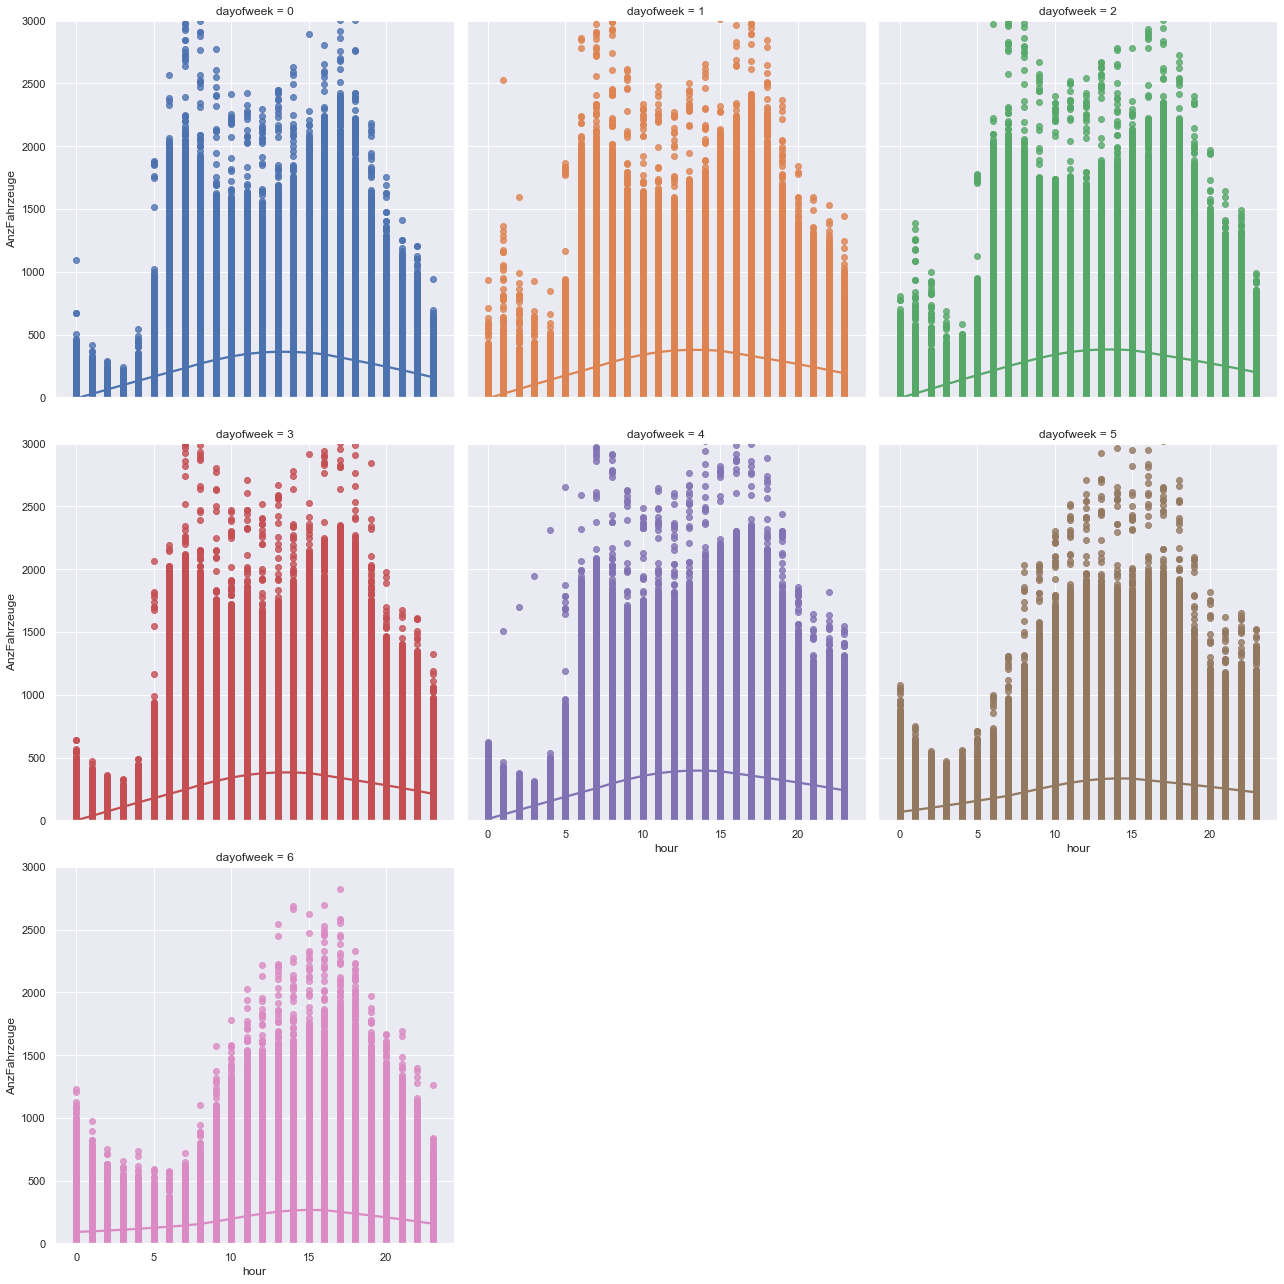

In [143]:
g = sns.lmplot(
    x="hour",
    y="AnzFahrzeuge",
    col="dayofweek",
    hue="dayofweek",  # kinda useless, but nice to look at!
    data=zh_verkehr,
    col_wrap=3,  # How many plots per row
    height=6,
    #order=2,  # polynomial regression of order, best for 1 or 2
    lowess = True,
     ci       = 95,
).set(ylim=(0,3000))

# LOWESS (Locally Weighted Scatterplot Smoothing)

(736330.0, 737506.9583333334)

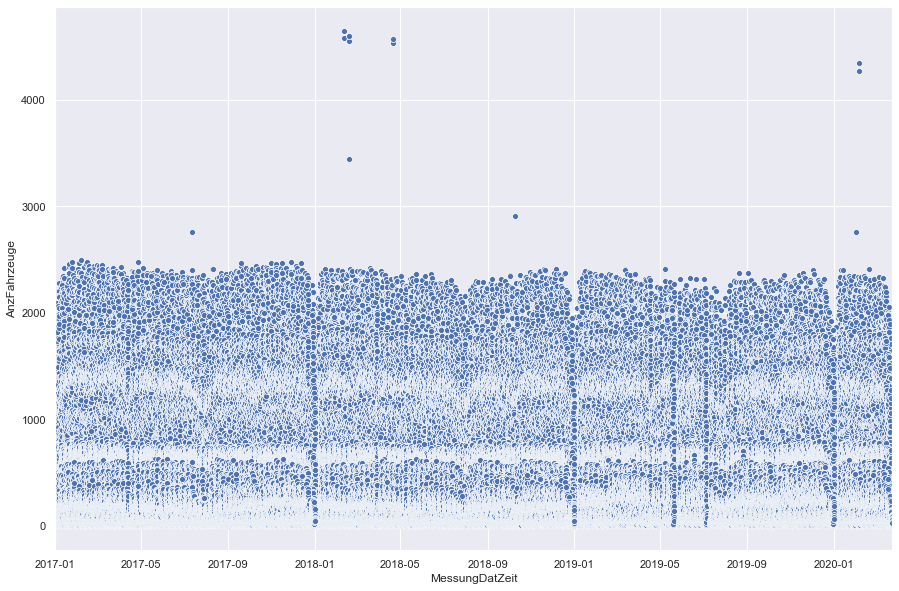

In [395]:
sns.set_style("darkgrid")
plt.figure(figsize=(15, 10))
ax = sns.scatterplot(x="MessungDatZeit", y="AnzFahrzeuge", data=zh_verkehr_cleaned)
ax.set_xlim([min(zh_verkehr_cleaned.MessungDatZeit), max(zh_verkehr_cleaned.MessungDatZeit)])

In [396]:
lowess = sm.nonparametric.lowess

In [402]:
%%time
lowess_anzfahrzeuge = lowess(
    exog=zh_verkehr_cleaned.MessungDatZeit,
    endog=zh_verkehr_cleaned.AnzFahrzeuge,
    frac=0.01,
    return_sorted=False,
    missing="drop"
)

Wall time: 3min


In [403]:
len(lowess_anzfahrzeuge)

3305016

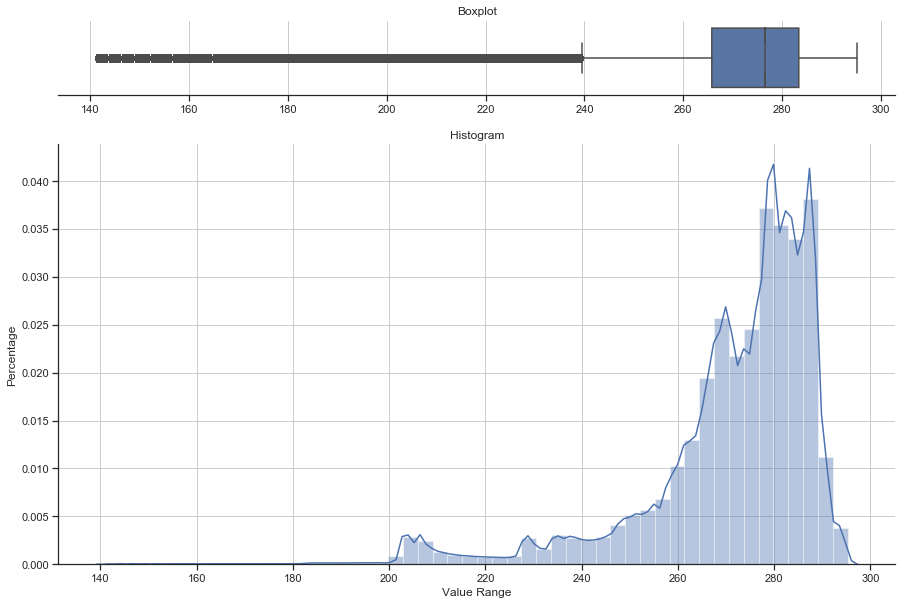

In [404]:
boxplot_histogram(lowess_anzfahrzeuge)

In [411]:
zh_verkehr_cleaned = zh_verkehr_cleaned.drop(columns=["anzfahrzeuge_lowess"])
zh_verkehr_cleaned.loc[:,"anzfahrzeuge_lowess"] = lowess_anzfahrzeuge

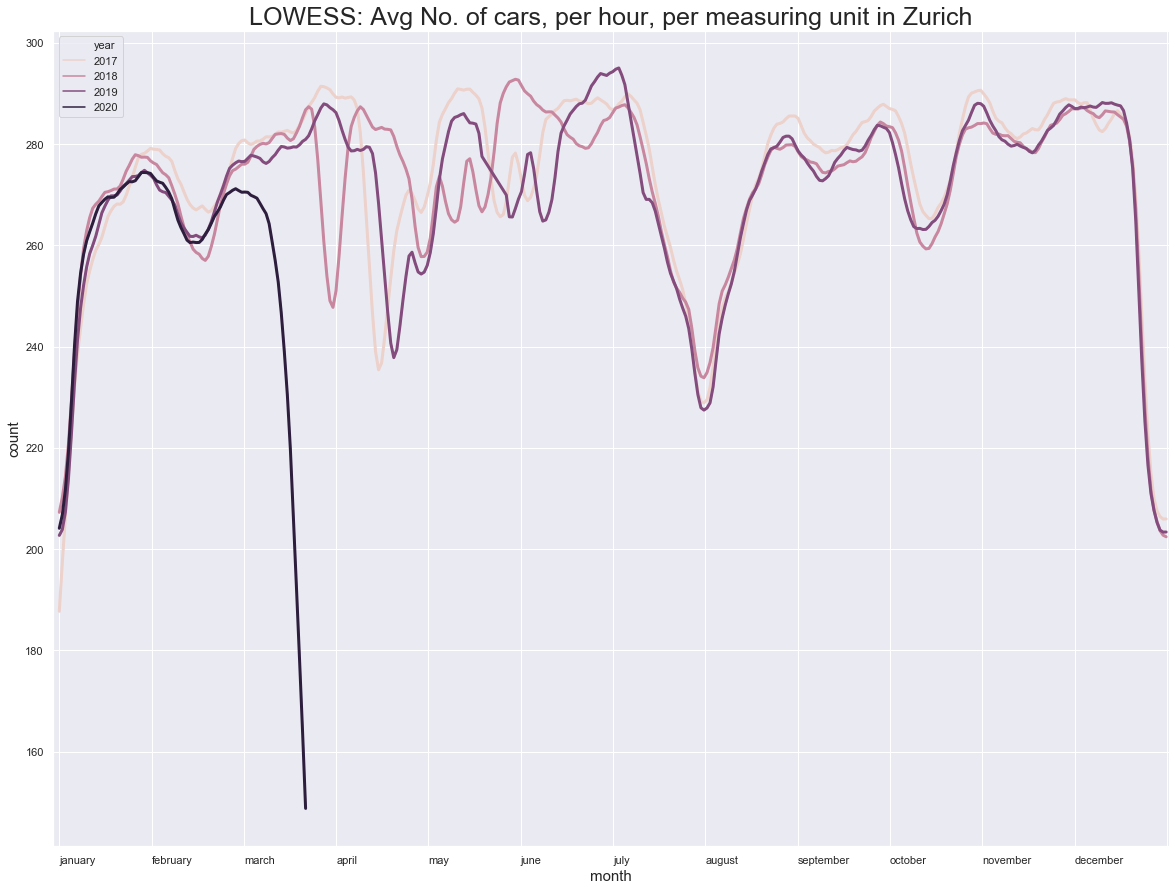

In [406]:
sns.set_style("darkgrid")

xticks = np.linspace(start=1, stop=365.25, num=13, endpoint=True)

plt.figure(figsize=(20, 15))

ax = sns.lineplot(
    x="dayofyear",
    y="anzfahrzeuge_lowess",
    hue="year",
    linewidth=3,
    data=zh_verkehr_cleaned[~zh_verkehr_cleaned.anzfahrzeuge_lowess.isna()],
    legend="full",
)
ax.set_xticks(xticks)
ax.set_xticklabels(
    [
        "january",
        "february",
        "march",
        "april",
        "may",
        "june",
        "july",
        "august",
        "september",
        "october",
        "november",
        "december",
        "",
    ]
)
plt.xticks(rotation=0, ha="left")
ax.set_xlim([-1, 366])

plt.xlabel("month", fontsize=15)
plt.ylabel("car-count per hour, per measuring unit", fontsize=15)
plt.title("LOWESS: Number of cars detected per measuring unit in Zurich (city)", fontsize=25)

plt.savefig("anz_cars_01.png")

In [423]:
zh_verkehr_cleaned.describe().round(1)

,EKoord,NKoord,Knummer,AnzDetektoren,D1ID,AnzFahrzeuge,hour,dayofweek,year,dayofyear,anzfahrzeuge_lowess
count,3305016.0,3305016.0,3305016.0,3305016.0,3305016.0,3267418.0,3305016.0,3305016.0,3305016.0,3305016.0,3267418.0
mean,2682343.2,1248472.0,433.8,1.5,12.8,344.7,11.5,3.0,2018.1,173.1,271.1
std,2001.9,2443.3,247.9,0.6,6.4,339.0,6.9,2.0,0.9,108.0,18.8
min,2678132.3,1242969.9,3.0,1.0,1.0,0.0,0.0,0.0,2017.0,1.0,141.3
25%,2681455.2,1247014.4,305.0,1.0,11.0,95.0,5.8,1.0,2017.0,74.0,265.8
50%,2682467.0,1247929.7,428.0,1.0,13.0,251.0,11.5,3.0,2018.0,169.0,276.5
75%,2683585.4,1250227.0,661.0,2.0,16.0,471.0,17.2,5.0,2019.0,267.0,283.4
max,2687628.7,1253804.2,789.0,3.0,29.0,4642.0,23.0,6.0,2020.0,365.0,295.2


In [425]:
zh_verkehr_cleaned.sample(3).T

,1159541,843507,1171646
MSID,Z071M002,Z052M001,Z072M001
MSName,Unbekannt,Unbekannt,Unbekannt
ZSID,Z071,Z052,Z072
ZSName,Badenerstrasse (Zypressenstrasse),Hirschwiesentunnel,Manessestrasse (Weststrasse)
Achse,Badenerstrasse,Hirschwiesentunnel,Manessestrasse
HNr,298,Unbekannt,Unbekannt
Hoehe,Unbekannt,Westportal,Weststrasse
EKoord,2681175,2682984,2682048
NKoord,1247888,1250310,1247026
Richtung,Seebahnstrasse,Winterthur,auswärts


In [426]:
zh_verkehr_cleaned.columns

Index(['MSID', 'MSName', 'ZSID', 'ZSName', 'Achse', 'HNr', 'Hoehe', 'EKoord',
       'NKoord', 'Richtung', 'Knummer', 'Kname', 'AnzDetektoren', 'D1ID',
       'D2ID', 'D3ID', 'D4ID', 'MessungDatZeit', 'LieferDat', 'AnzFahrzeuge',
       'AnzFahrzeugeStatus', 'hour', 'dayofweek', 'month_name', 'year',
       'dayofyear', 'anzfahrzeuge_lowess'],
      dtype='object')

In [442]:
prep_01 = zh_verkehr_cleaned.loc[
    :,
    [
        # "MessungDatZeit",
        "hour",
        # "dayofweek",
        # "month_name",
        "year",
        "dayofyear",
        "anzfahrzeuge_lowess",
    ],
].drop_duplicates()

prep_01.loc[:, "hourofyear"] = prep_01.hour + (prep_01.dayofyear - 1) * 24

prep_02 = pd.pivot_table(
    prep_01, index="hourofyear", columns="year", values="anzfahrzeuge_lowess"
).reset_index()

del prep_01


In [445]:
prep_02.loc[:, "temp"] = 1 - prep_02.loc[:,2020]/prep_02.loc[:,2019]

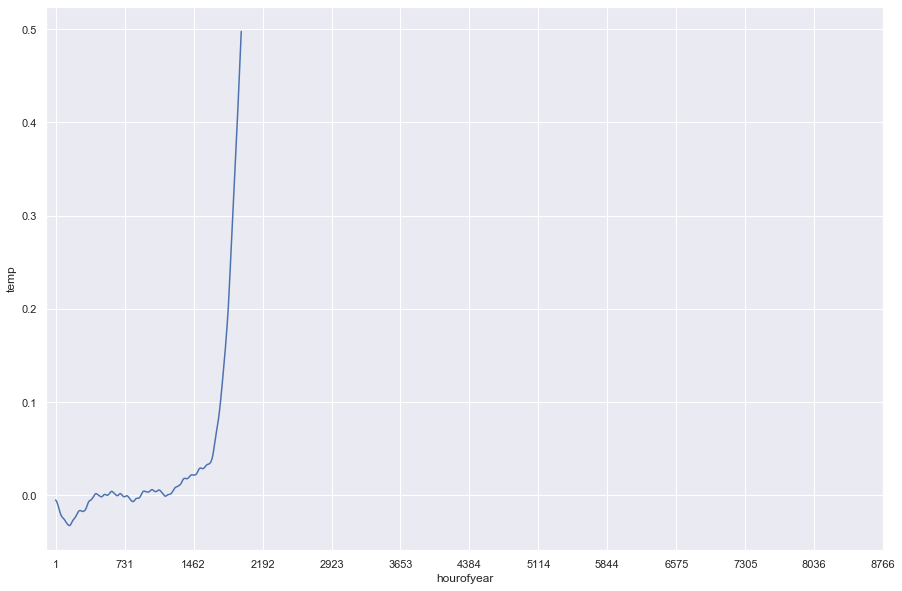

In [450]:
plt.figure(figsize=(15,10))
xticks = np.linspace(start=1, stop=365.25*24, num=13, endpoint=True)

ax=sns.lineplot(x="hourofyear", y="temp",data=prep_02)

ax.set_xticks(xticks)

In [453]:
link_covid = "C:/Users/stc/Documents/GitHub/COVID-19/who_covid_19_situation_reports/who_covid_19_sit_rep_time_series/who_covid_19_sit_rep_time_series.csv"

covid_df = pd.read_csv(link_covid,low_memory=False)

In [481]:
#covid_df

In [487]:
covid19_ch = pd.DataFrame(
    covid_df[covid_df.loc[:, "Country/Region"] == "Switzerland"].stack()
).reset_index().iloc[2:, 1:].rename(
    columns={"level_1": "datum", 0: "covid19_new_cases"}
).astype(
    {"datum": "datetime64[ns]", "covid19_new_cases": "int64"}
)

In [488]:
desc_col(covid19_ch)

,DTYPE,NULLS,UNIQUE
datum,datetime64[ns],0/25,25
covid19_new_cases,int64,0/25,22


In [492]:
covid19_ch

,datum,covid19_new_cases
2,2020-02-26,1
3,2020-02-27,1
4,2020-02-28,6
5,2020-02-29,10
6,2020-03-01,18
7,2020-03-02,26
8,2020-03-03,30
9,2020-03-04,27
10,2020-03-05,56
11,2020-03-06,86


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

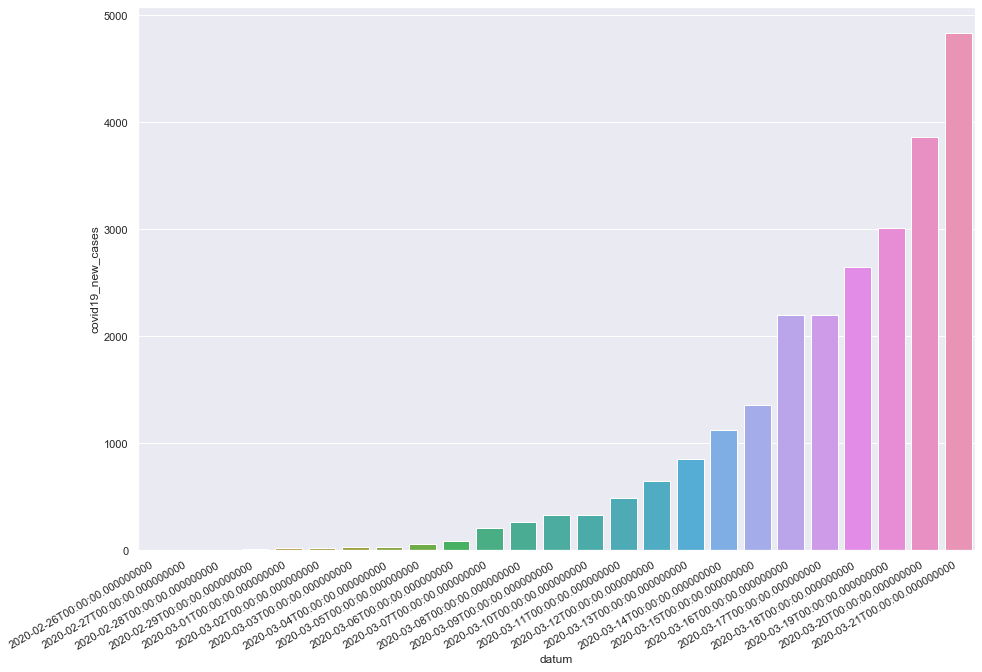

In [491]:
plt.figure(figsize=(15,10))
#xticks = np.linspace(start=1, stop=365.25*24, num=13, endpoint=True)

ax=sns.barplot(x="datum", y="covid19_new_cases",data=covid19_ch)
plt.xticks(rotation=30, ha="right")
#ax.set_xticks(xticks)